In [1]:
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import minimize, NonlinearConstraint

import itertools
import scipy
import scipy.integrate as spi
from scipy.integrate import quad
from scipy.special import erf,erfc
#import cvxpy as cp

from sympy import symbols, solve
from scipy.optimize import fsolve, root
from numpy.polynomial import polynomial as P

In [2]:
#Defining the survival probability

def S2(t,B,x0,u,var):
    return 0.5*(1-erf((B-x0-u*t)/(np.sqrt(var*2*t))))-np.exp(-(2*u*(x0-B))/(var))*0.5*(1+erf((B-x0+u*t)/(np.sqrt(var*2*t))))
def S1(t,B,x0,u,var): #just another way to write it
    return 0.5*erfc((B-x0-u*t)/(np.sqrt(var*2*t)))-0.5*np.exp(-(2*u*(x0-B))/(var))*erfc((x0-B-u*t)/(np.sqrt(var*2*t)))

In [4]:
def horse_wins(p):
    #Do the race!
    limits=np.cumsum(p)
    random_num=(random.uniform(0,1))
    #print(random_num)
    check=(random_num<=limits)
    indice_caballo=0
    while ~check[indice_caballo]:
      indice_caballo+=1
    return indice_caballo

In [5]:
#Compute extinction probability by simulations for different thresholds
umbrales=np.linspace(-3.5,0,40)

num_realizations=40#000
num_races=100
P_ext=np.zeros_like(umbrales)
p = np.array([0.35581295, 0.15059079, 0.49359625])
p=p/sum(p)
r =  np.array([0.63323307, 0.3093805,  0.05738643])
#Kelly's betting
b=p

for i in range(0,len(umbrales)):
  threshold=umbrales[i]
  print("Threshold:", threshold)
  extinctions=0
  log_capital=np.zeros(num_races)
  initial_capital=1
  for j in range(0,num_realizations-1): #realizations for
    log_capital[0]=np.log(initial_capital)
    for k in range(1,num_races): #races for loop
      #Which horse wins? Do the race
      horse=horse_wins(p)
      #print("horse wins:",horse)
      #Compute capital increase
      log_capital[k]=log_capital[k-1]+np.log(b[horse]/r[horse])
      if log_capital[k]<=threshold:
        extinctions=extinctions+1
        break #we can stop simulating once is extinct
  #plt.plot(log_capital)
  #Normalize number of extinctions
  P_ext[i]=extinctions/num_realizations
  print(P_ext[i])
  print('-----END--------')


Threshold: -3.5
0.025
-----END--------
Threshold: -3.41025641025641
0.025
-----END--------
Threshold: -3.3205128205128207
0.0
-----END--------
Threshold: -3.230769230769231
0.0
-----END--------
Threshold: -3.141025641025641
0.075
-----END--------
Threshold: -3.051282051282051
0.0
-----END--------
Threshold: -2.9615384615384617
0.05
-----END--------
Threshold: -2.871794871794872
0.025
-----END--------
Threshold: -2.782051282051282
0.05
-----END--------
Threshold: -2.6923076923076925
0.075
-----END--------
Threshold: -2.6025641025641026
0.05
-----END--------
Threshold: -2.5128205128205128
0.05
-----END--------
Threshold: -2.4230769230769234
0.125
-----END--------
Threshold: -2.333333333333333
0.075
-----END--------
Threshold: -2.2435897435897436
0.15
-----END--------
Threshold: -2.1538461538461537
0.075
-----END--------
Threshold: -2.064102564102564
0.075
-----END--------
Threshold: -1.9743589743589745
0.1
-----END--------
Threshold: -1.8846153846153846
0.15
-----END--------
Threshold: -

In [6]:
#Compute P_ext with geometric brownian motion formula
Deltas=np.log(b/r)
Deltas2=np.log(b/r)**2
W_ave=np.dot(p,Deltas)
sigma2_ave=(np.dot(p,Deltas2)-(np.dot(p,Deltas))**2)
print(Deltas)
print(W_ave)
print(sigma2_ave)
t=100
x0=0
P_ext_GBM=np.zeros_like(umbrales)
for i in range(0,len(umbrales)):
  P_ext_GBM[i]=1-S2(t,umbrales[i],x0,W_ave,sigma2_ave)

[-0.57643337 -0.72000574  2.15191002]
0.7486460320460321
1.921528973320267


Text(0.5, 1.0, '(b)')

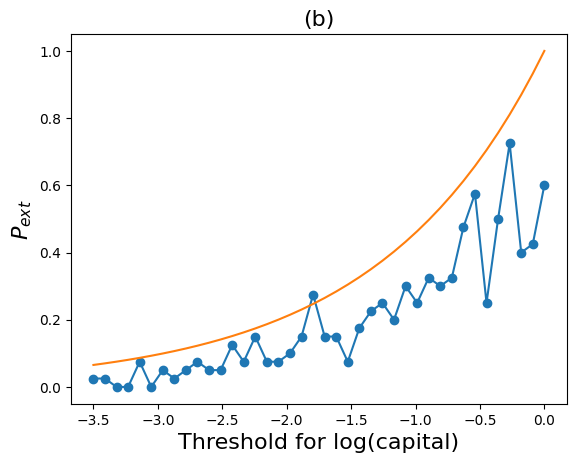

In [7]:
figura=plt.figure()
plt.plot(umbrales,P_ext,'-o',umbrales,P_ext_GBM)
plt.xlabel(r'Threshold for log(capital)',fontsize=16)
plt.ylabel(r'$P_{ext}$',fontsize=16)
plt.title('(b)',fontsize=16)

In [ ]:
#Run this if in Colab and want to store figure
# mount drive

#from google.colab import drive
#drive.mount('/content/gdrive')
#figures_dir = '/content/gdrive/My Drive/Colab Notebooks'



Mounted at /content/gdrive


In [9]:
nombre_archivo="GBM_vs_P_ext_40thr_40000real_2.pdf"
figura.gca()
#Uncomment this to save figure in GDrive. You have to mount using the previous cell
#figura.savefig(f"{figures_dir}/"+nombre_archivo)

#Uncomment this to save figure in local hard disk
#figura.savefig(f"{nombre_archivo}")

Threshold: -0.5


Text(0.5, 1.0, '(a)')

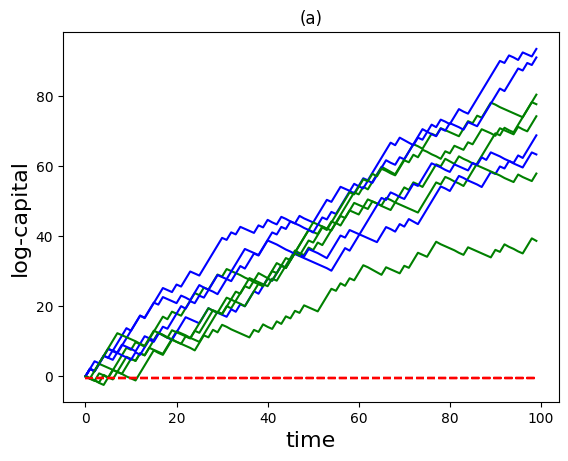

In [8]:
#Simulate some trajectories, color differently when they touch the threshold

num_realizations=10
num_races=100

p = np.array([0.35581295, 0.15059079, 0.49359625])
p=p/sum(p)
r =  np.array([0.63323307, 0.3093805,  0.05738643])
#Kelly's betting
b=p


threshold=-0.5
print("Threshold:", threshold)
extinctions=0
log_capital=np.zeros(num_races)
initial_capital=1
toco=np.zeros(num_realizations)
t=range(0,num_races)
fig=plt.figure()
for j in range(0,num_realizations-1): #realizations for
  log_capital[0]=np.log(initial_capital)
  for k in range(1,num_races): #races for loop
  #Which horse wins? Do the race
    horse=horse_wins(p)
    #print("horse wins:",horse)
    #Compute capital increase
    log_capital[k]=log_capital[k-1]+np.log(b[horse]/r[horse])
    if log_capital[k]<=threshold:
      extinctions=extinctions+1
      toco[j]=1
  if toco[j]==1:
    color='g'
  else:
    color='b'

  plt.plot(t,log_capital,color)
  plt.plot(t,np.ones_like(t)*threshold,'r--')
plt.xlabel('time',fontsize=16)
plt.ylabel('log-capital',fontsize=16)
#plt.title('non-constrained trajectories for $l = $'+str(threshold))
plt.title('(a)')

In [ ]:
nombre_archivo="non-constrained_trajectories_2.pdf"
fig.gca()
fig.savefig(f"{figures_dir}/"+nombre_archivo)